In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

### Talkapalooza - TL BL SS 23

# Data loading:

## Preparing packages:

Expected dependencies:
```
fastai: 2.1.5
fastcore: 1.3.4
wwf: 0.0.7
fastaudio: 0.1.3
torchaudio: 0.7.2
```



In [4]:
 import subprocess
 import json

In [5]:
dependencies = ['fastai', 'fastcore', 'wwf', 'fastaudio', 'torchaudio']

In [8]:
 data = subprocess.check_output(["pip", "list", "--format", "json"])
 parsed_results = json.loads(data)

 for package in parsed_results:
  if package['name'] in dependencies:
    print(package['name'], package['version'])

fastai 2.7.12
fastcore 1.5.29
torchaudio 2.0.2+cu118


In [10]:
# !pip install fastaudio==0.1.3
# !pip install wwf==0.0.7

In [6]:
 data = subprocess.check_output(["pip", "list", "--format", "json"])
 parsed_results = json.loads(data)

 for package in parsed_results:
  if package['name'] in dependencies:
    print(package['name'], package['version'])

fastai 2.1.5
fastaudio 0.1.3
fastcore 1.3.4
torchaudio 2.0.2+cu118
wwf 0.0.7


## Loading the audio files:

Note: fastaudio threw an error, saying that fastcore was installed at a higher version than what it expected. Restarting the runtime solved this error.

In [9]:
from fastai.vision.widgets import *
from fastai.vision.core import *
from fastai.vision.data import *
from fastai.data.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *

In [8]:
print(audio_extensions[::5])
print(f'".ogg" in audio_extensions: {".ogg" in audio_extensions}')

('.m3u', '.3gpp2', '.au', '.aif', '.726', '.awb', '.at3', '.sco', '.evb', '.l16', '.mpega', '.sid', '.xhe', '.mlp', '.pya', '.multitrack', '.wax')
".ogg" in audio_extensions: True


### Connecting to Google Drive:

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
src = '/content/drive/MyDrive/talkapalooza/labelled_audio'

### Getting audio files:

In [7]:
audio_data = get_files(src, extensions=audio_extensions)

In [12]:
audio_data[:5]

(#5) [Path('/content/drive/MyDrive/talkapalooza/labelled_audio/yellow/yellow--Back-ache.ogg'),Path('/content/drive/MyDrive/talkapalooza/labelled_audio/yellow/yellow--Nattes-à-chat.ogg'),Path('/content/drive/MyDrive/talkapalooza/labelled_audio/yellow/yellow--Lirazelf.ogg'),Path('/content/drive/MyDrive/talkapalooza/labelled_audio/big/big--Opsylac.ogg'),Path('/content/drive/MyDrive/talkapalooza/labelled_audio/big/big--Lirazelf.ogg')]

In [13]:
len(audio_data)

1205

#### Opening a singular audio file:

Fastaudio tends to display several Pytorch warnings.

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
audio_tensor = AudioTensor.create(audio_data[0])

In [16]:
audio_tensor, audio_tensor.size()

(AudioTensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
               0.0000e+00, 3.0518e-05],
              [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
               0.0000e+00, 3.0518e-05]]),
 torch.Size([2, 42689]))

<Axes: >

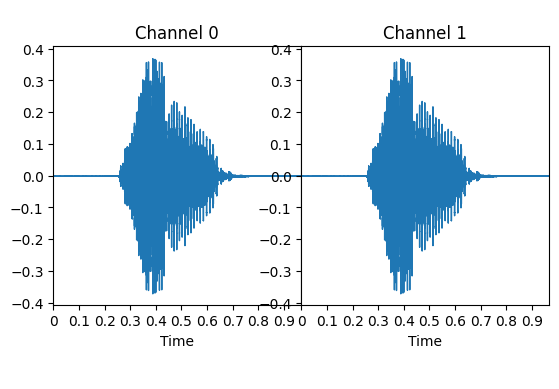

In [17]:
audio_tensor.show()

## Configuring FastAudio:

To avoid
```
TypeError: SymmetricalLogScale.__init__() got an unexpected keyword argument 'linthreshy'
```
we need to install an older version of matplotlib.


In [10]:
import matplotlib as plt

In [13]:
plt.__version__

'3.7.1'

In [15]:
# !pip install matplotlib==3.3

In [11]:
plt.__version__

'3.3.0'

In [12]:
config = AudioConfig.Voice()

In [13]:
to_spectrogram = AudioToSpec.from_cfg(config)

Execution takes 6+ minutes:

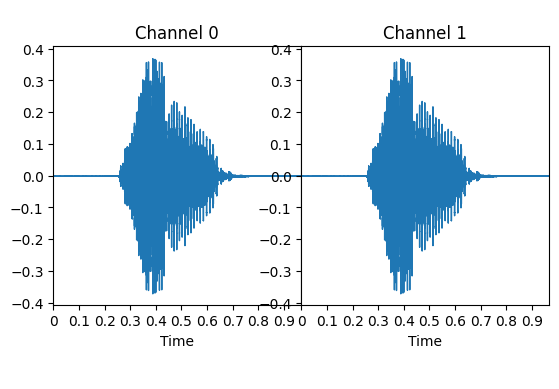

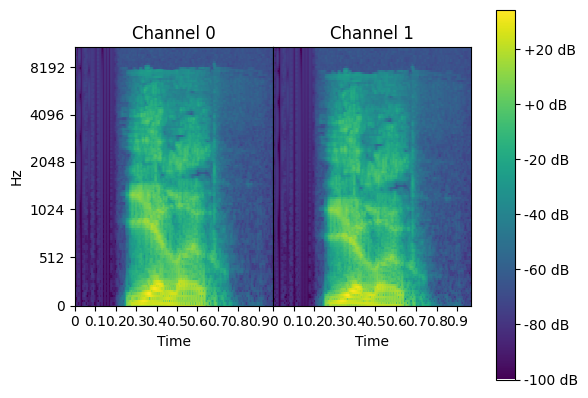

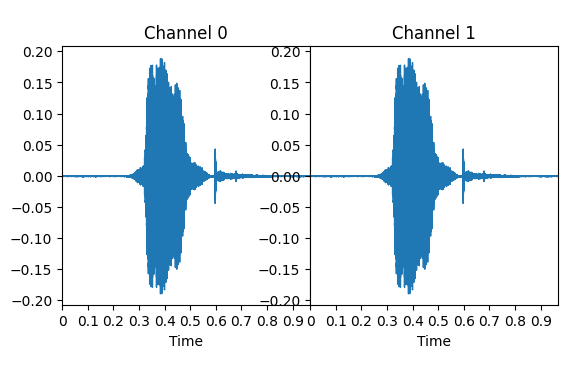

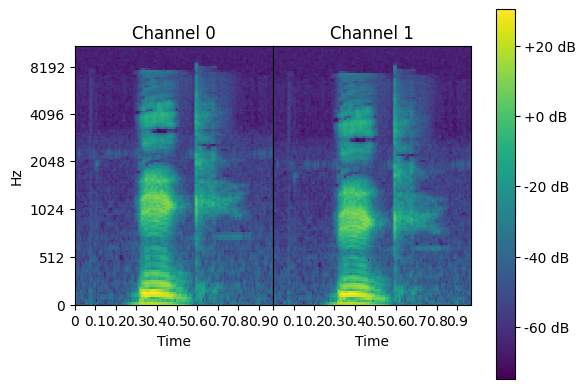

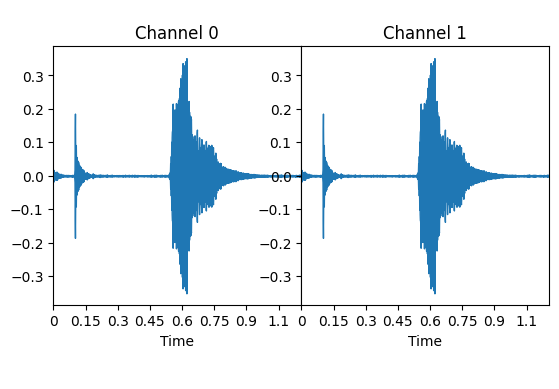

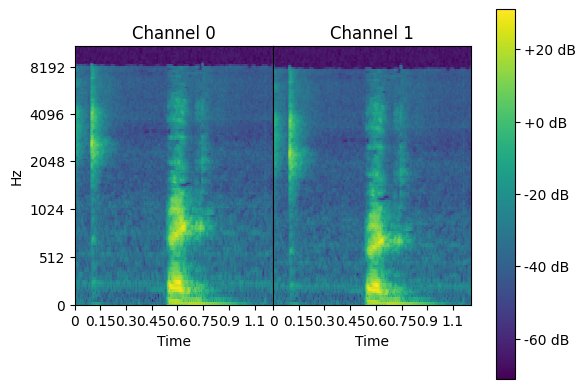

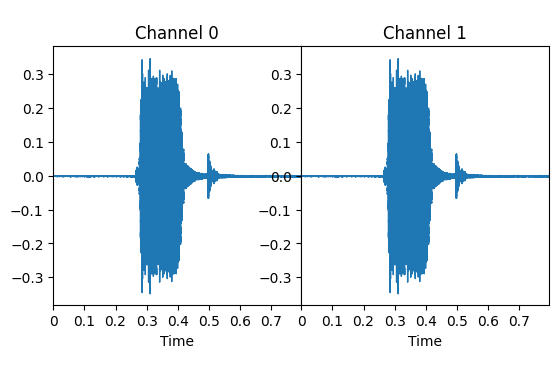

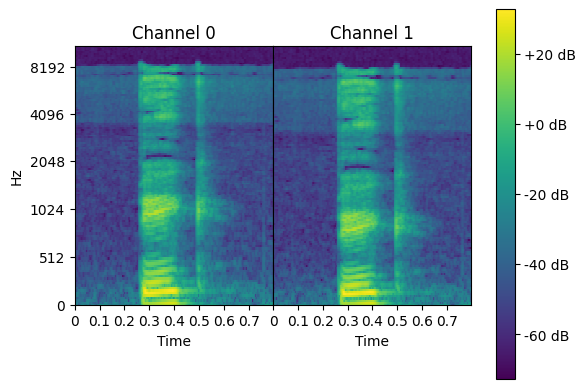

In [17]:
for f in audio_data[:10:3]:
  audio = AudioTensor.create(f)
  audio.show()
  spectrogram = AudioToSpec.from_cfg(AudioConfig.Voice())(audio)
  spectrogram.show()

Different lengths.

Executing in GPU-based runtime took 4m47s:

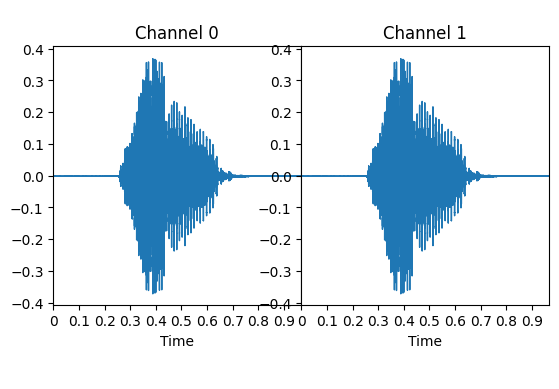

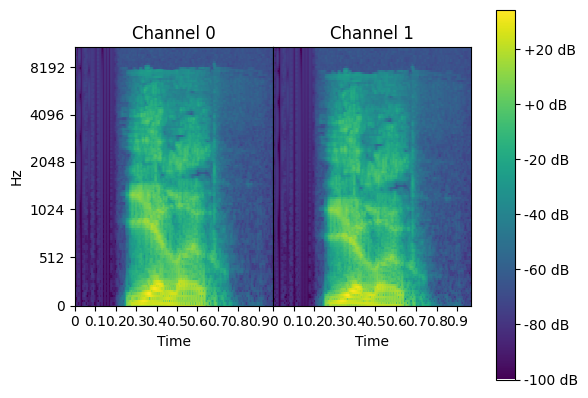

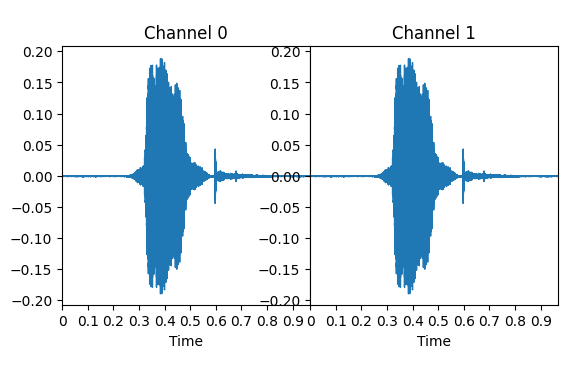

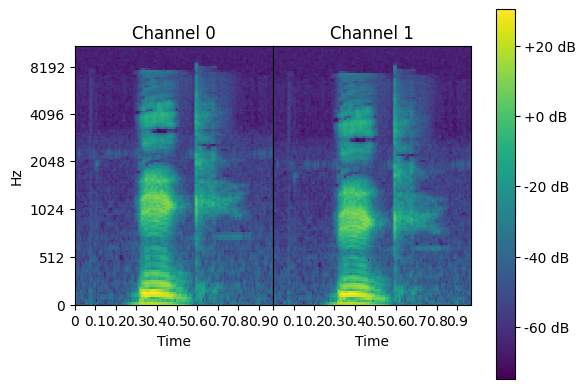

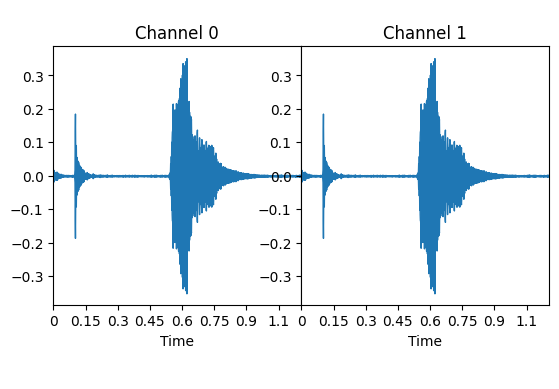

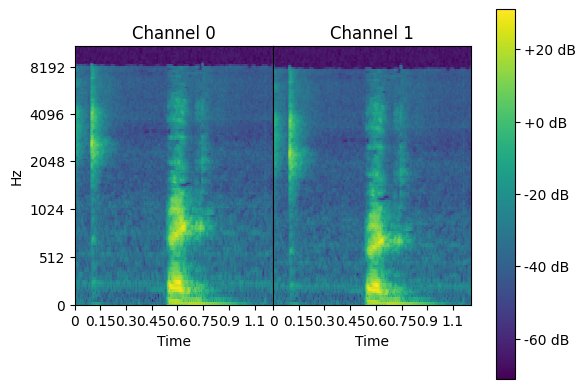

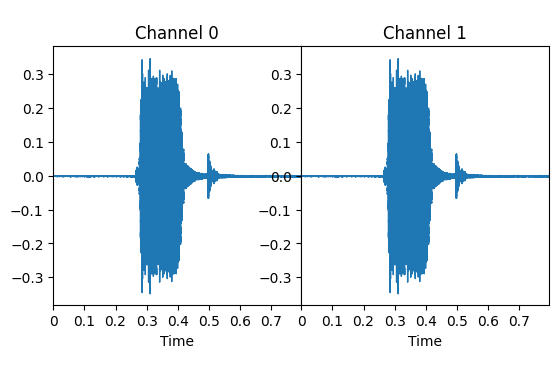

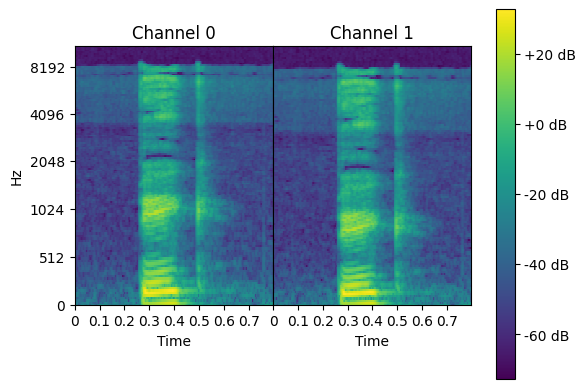

In [17]:
for f in audio_data[:10:3]:
  audio = AudioTensor.create(f)
  audio.show()
  spectrogram = AudioToSpec.from_cfg(AudioConfig.Voice())(audio)
  spectrogram.show()

To ensure same length for all recordings:

### Normalizing size of spectrograms:

In [14]:
crop1s = ResizeSignal(1000)

In [15]:
pipe = Pipeline([AudioTensor.create, crop1s, to_spectrogram])

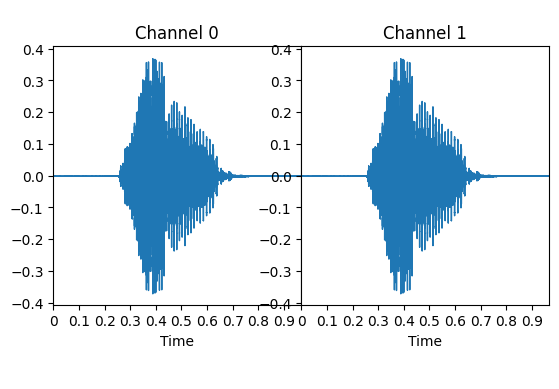

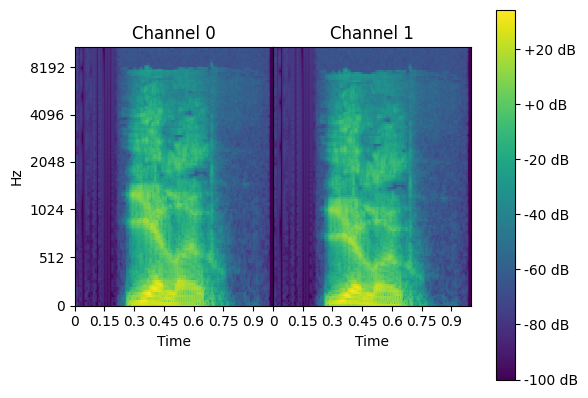

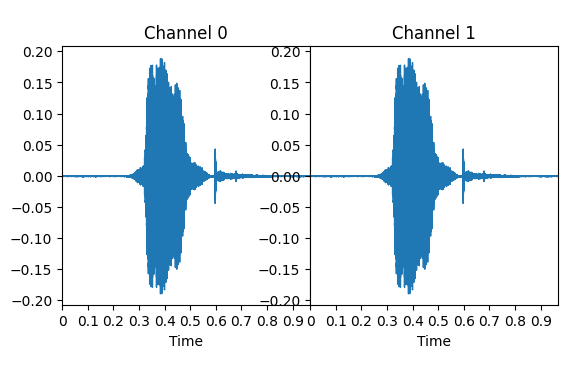

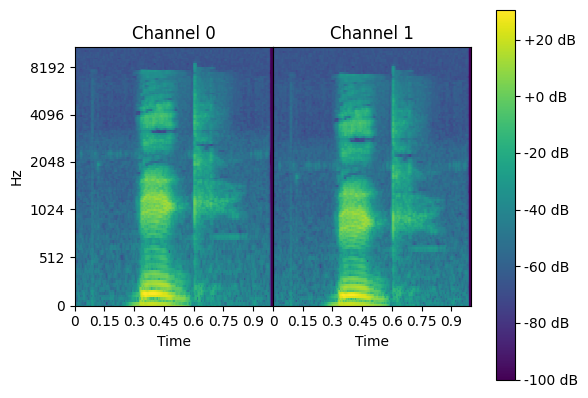

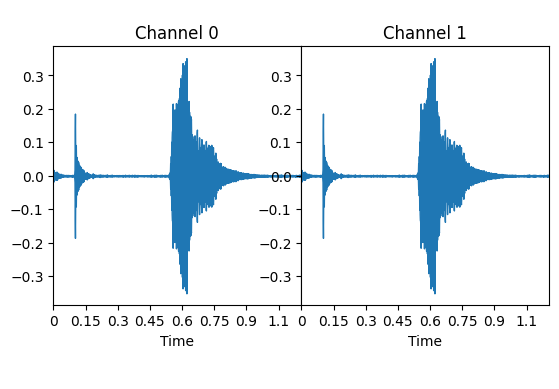

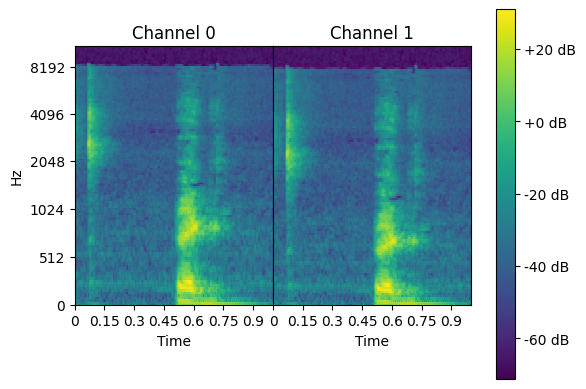

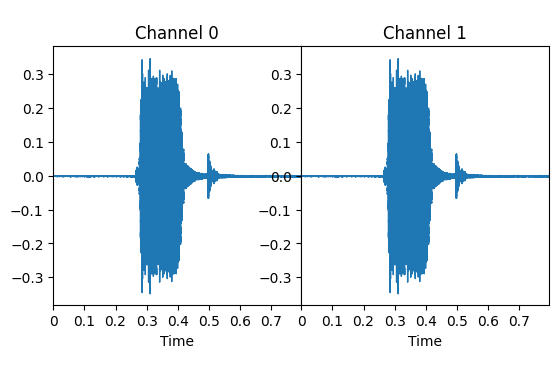

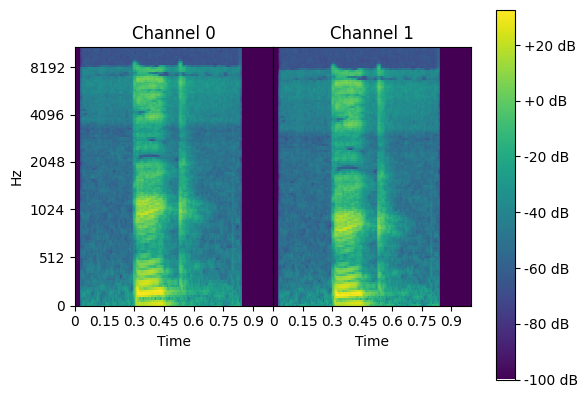

In [20]:
for f in audio_data[:10:3]:
  audio = AudioTensor.create(f)
  audio.show()
  pipe(f).show()

All the same size now.

### DataBlock API to create batches:

Look at file names as reminder:

In [22]:
audio_data[0].name

'yellow--Back-ache.ogg'

In [23]:
audio_data[0].name.split('--')[0]

'yellow'

In [16]:
get_y = lambda x: x.name.split('--')[0]

In [17]:
item_tfms = [ResizeSignal(1000), to_spectrogram]

In [18]:
aud_words = DataBlock(blocks=(AudioBlock, CategoryBlock),
                 get_items=get_audio_files,
                 splitter=RandomSplitter(),
                 item_tfms = item_tfms,
                 get_y=get_y)

In [19]:
dls = aud_words.dataloaders(src, bs=64)

In [27]:
dls.show_batch()

AttributeError: ignored

https://forums.fast.ai/t/attributeerror-fakeloader-object-has-no-attribute-persistent-workers/81167/5

In [34]:
# !pip install torch==1.13
# !pip install torchaudio==0.13.1

In [20]:
dls.show_batch()

AttributeError: ignored

Error persists. Try different approach from a more up-to-date source.